##### Problem Statement

##### About the Client:
Mohkart is a leading e-commerce player in India. As a consultant, you have been hired to derive actionable insights that will help Mohkart prepare customer segment-specific strategies to further optimize their operations and marketing campaigns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df=pd.read_excel(r'C:\Users\lucky\OneDrive\Desktop\Data Set.xlsx')

In [21]:
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CustomerID    100000 non-null  int64         
 1   Age           100000 non-null  int64         
 2   Device        100000 non-null  object        
 3   City          100000 non-null  object        
 4   Product       100000 non-null  object        
 5   Price         100000 non-null  float64       
 6   Quantity      100000 non-null  int64         
 7   PurchaseDate  100000 non-null  datetime64[ns]
 8   BrowsingTime  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 6.9+ MB


#  a.) CustomerProfiling

###  Segment the customers based on their purchase behavior, age, city or any other relevant factors

In [5]:
df.columns

Index(['CustomerID', 'Age', 'Device', 'City', 'Product', 'Price', 'Quantity',
       'PurchaseDate', 'BrowsingTime'],
      dtype='object')

## Step 1: Data Preparation

In [6]:
df.isna().sum()     # Here in this data there will be no null value 

CustomerID      0
Age             0
Device          0
City            0
Product         0
Price           0
Quantity        0
PurchaseDate    0
BrowsingTime    0
dtype: int64

After data is clean and properly formatted and next is to Remove any irrelevant columns and handle missing values if present.

In [7]:
relevant_columns= ['Age','City','Product','Price','Quantity']
df=df[relevant_columns]

In [8]:
# handling missing value if present
df.dropna(inplace=True)

In [9]:
df.shape

(100000, 5)

After removing irrelvant columns and null values in a data , next step is validate the data

In [10]:
print('Total number of rows is :' , df.shape[0])
print('Total number of columns is : ',df.shape[1])

Total number of rows is : 100000
Total number of columns is :  5


## Step 2: Encode the categorical variable 

In [11]:
df_encoded = pd.get_dummies(df,columns=['City','Product'])

In [12]:
df.shape

(100000, 5)

## Step 3: Choose Clustering Algorithm

Selecting an appropriate clustering algorithm. We'll use K-means clustering for this Data.

In [13]:
from sklearn.cluster import KMeans

# Initialize KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)


## Step 4: Perform Clustering

Apply the chosen clustering algorithm to segment customers into clusters based on their features.

In [14]:
# Fit KMeans model to the data
clusters = kmeans.fit_predict(df_encoded)


C:\Users\lucky\.conda\py\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Step 5: Interpretation and Profiling

Analyzing the characteristics of each cluster to understand the different customer segments.

In [15]:
df['Cluster'] = clusters                               # Add clusters to the DataFrame


cluster_means = df.groupby('Cluster').mean()           # Analyze cluster characteristics
print(cluster_means)


               Age          Price  Quantity
Cluster                                    
0        44.049733    5206.060972  5.510211
1        44.344768  130168.166099  5.479417
2        44.050348   40201.180647  5.502517


C:\Users\lucky\AppData\Local\Temp\ipykernel_7248\367596403.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('Cluster').mean()           # Analyze cluster characteristics


### Cluster 0:
###### Characteristics:
- Customers in this cluster have an average age of approximately 44 years.
- They tend to make purchases with an average price around 5,206 dollar.
- On average, they purchase around 5.5 items.

###### Interpretation:
- This cluster may represent a group of middle-aged customers who make moderate-priced purchases.


### Cluster 1:
###### Characteristics:
- Customers in this cluster also have an average age of around 44 years.
- They make significantly higher-priced purchases, with an average price of approximately 130,168 dollar.
- Similar to Cluster 0, they purchase around 5.5 items on average.

###### Interpretation:
- This cluster likely represents a segment of high-value customers who make luxury or high-ticket purchases.


### Cluster 2:
###### Characteristics:
- Customers in this cluster, again, have an average age of approximately 44 years.
- They make purchases with an average price of about 40,201 dollar.
- Similar to the other clusters, they also purchase around 5.5 items on average.

###### Interpretation:
- This cluster may represent another segment of customers who make relatively high-priced purchases but not as high as those in Cluster 1.

#  b.) Insights

###  Insights Generation:

### 1. Analyze the spending habits of different customer segments.

In [16]:
df.groupby(clusters)['Price'].agg(['sum','mean','count'])

,sum,mean,count
0,4.433221e+08,5206.060972,85155
1,3.035522e+08,130168.166099,2332
2,5.030374e+08,40201.180647,12513


Dataframe containing aggregate metrics for each cluster. It will have three columns: sum as total spending, mean as average spending per transaction, and count as total number of transactions.

### 2: Identify Trends, Patterns, or Anomalies in the Data

In [29]:
df

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10
...,...,...,...,...,...,...,...,...,...
99995,43568,60,Mobile,Srinagar,Gaming Console,37964.020836,4,2023-11-13 13:35:02,0
99996,60169,60,Tablet,Srinagar,Printer,2614.051519,5,2022-07-31 14:08:30,8
99997,50955,35,Mobile,Delhi,Bluetooth Speaker,4465.469808,8,2021-07-04 22:35:21,10
99998,86160,23,Mobile,Vadodara,Earbuds,506.209955,8,2024-02-12 17:56:37,19


In [31]:
df.head()

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,TotalSpending
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9,8882.812181
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1,211644.085513
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20,1569.849644
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8,88003.810440
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10,14073.686023


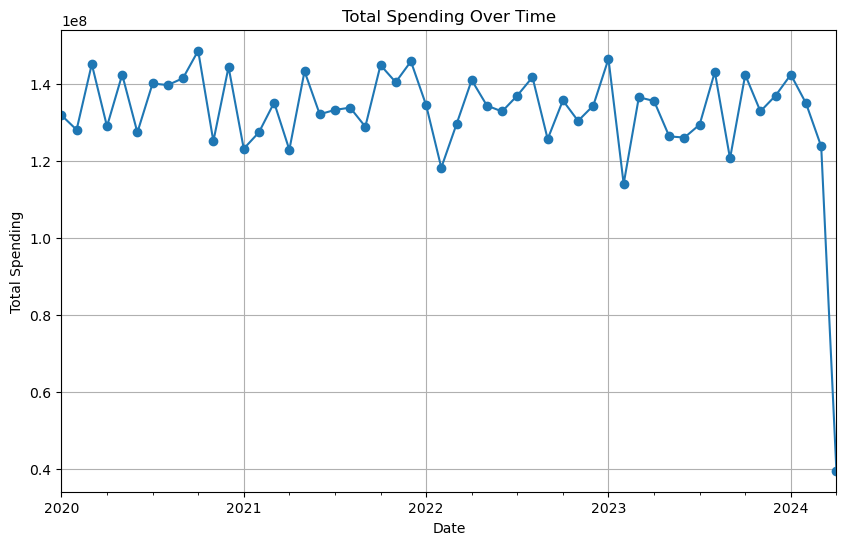

In [30]:
df['TotalSpending'] = df['Price'] * df['Quantity']

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])  # Converting 'PurchaseDate' to datetime

monthly_total_spending = df.groupby(df['PurchaseDate'].dt.to_period('M'))['TotalSpending'].sum() # Group by month and sum the total spending

# Plot total spending over time
plt.figure(figsize=(10, 6))
monthly_total_spending.plot(marker='o')
plt.title('Total Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.grid(True)
plt.show()


At the start of 2024, there's a big drop in spending. This is different from how spending was before. We need to find out why this drop happened. Understanding why this happened will help us make better plans for marketing and how we run things

### 3: Extract 2-3 Actionable Insights

##### (i)  Seasonal Spending Patterns:

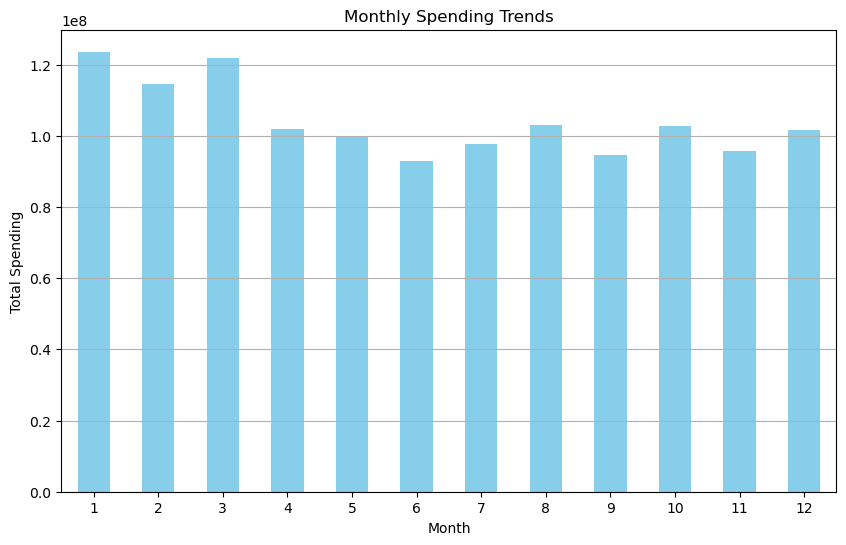

In [23]:
monthly_spending = df.groupby(df['PurchaseDate'].dt.month)['Price'].sum()

# Plot monthly spending trends
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='bar', color='skyblue')
plt.title('Monthly Spending Trends')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


##### High Spending in January:

- Interpretation: The peak in spending observed in January indicates a surge in purchasing activity at the beginning of the year.
- Analysis: Customers may be making purchases related to New Year's resolutions, such as fitness equipment, health products, or home organization items. Mohkart can capitalize on this trend by offering promotions or discounts on relevant products to attract customers looking to fulfill their New Year goals

##### (ii) Device Preference and Browsing Behavior:

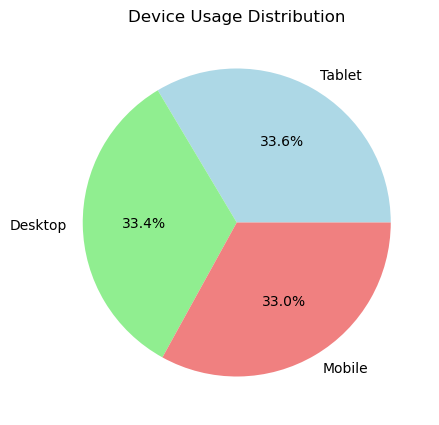

In [24]:
device_counts = df['Device'].value_counts()    # analyzing device usage

# Plot device usage distribution
plt.figure(figsize=(8, 5))
device_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Device Usage Distribution')
plt.ylabel('')
plt.show()


##### Interpretation:

The pie chart illustrates that customers use mobile, desktop, and tablet devices almost equally, with tablets slightly leading in usage (33.6%), followed closely by desktops (33.4%) and mobile devices (33.0%).

##### (iii) City-Specific Customer Segmentation: 

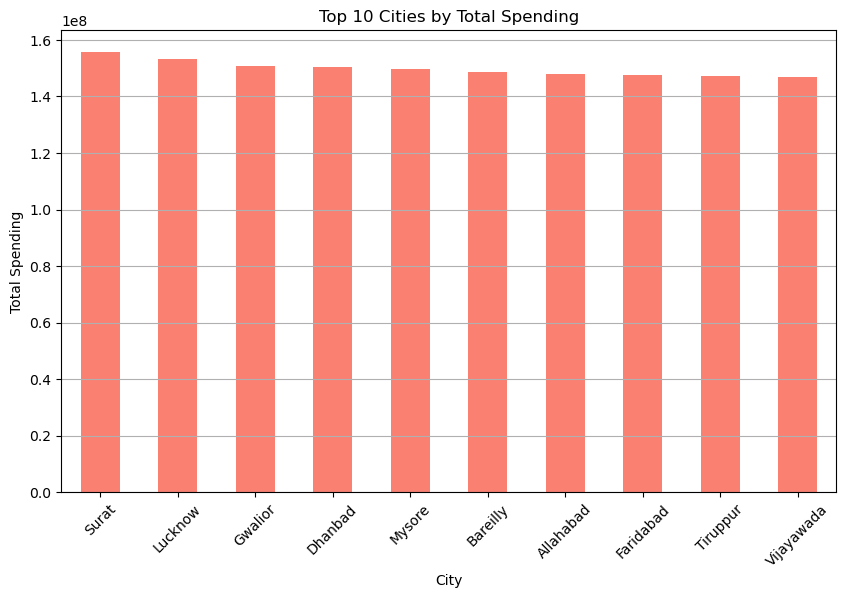

In [33]:
city_spending = df.groupby('City')['TotalSpending'].sum().sort_values(ascending=False).head(10)  # Group by city and sum the total spending

# Plot top 10 cities by spending
plt.figure(figsize=(10, 6))
city_spending.plot(kind='bar', color='salmon')
plt.title('Top 10 Cities by Total Spending')
plt.xlabel('City')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##### Interpretation:

The spending data for the top 10 cities shows varying levels of total expenditure, with surat having the highest total spending followed by Lucknow, Gwalior, Dhanbad and others.
These cities demonstrate significant purchasing power and consumer activity, contributing to Mohkart's overall revenue generation.

### 4. By actionable insights we mean type of insights based on which Mohakrt can make changes to their current strategies or create new strategies.

####  1.Seasonal Promotions and Campaigns:
- Strategy: Mohkart can develop targeted seasonal promotions and campaigns aligned with peak spending months, such as January and March. Special discounts, themed collections, and promotional offers can be introduced to capitalize on customer spending trends during these periods.

#### 2. Mobile Optimization and Enhancements:
-  Mohkart should prioritize mobile optimization and enhancements

#### 3. City-Specific Marketing and Localization:
- Mohkart can develop city-specific marketing strategies and localization efforts tailored to the preferences and behaviors of customers in high-spending cities. This includes launching targeted advertising campaigns, offering localized promotions and deals, and partnering with local influencers or businesses to increase brand awareness and engagement.

#### 4. Enhanced Delivery Services:
- Mohkart can differentiate itself by offering enhanced delivery services, such as same-day or next-day delivery options, in top-spending cities. By prioritizing fast and reliable delivery, Mohkart can enhance the shopping experience for customers and increase satisfaction and loyalty.

#### 5. Enhanced Customer Support and Service:
-  Mohkart can differentiate itself by offering exceptional customer support and service throughout the entire shopping journey. This includes providing timely and helpful assistance via multiple channels such as live chat, email, and phone support. Mohkart can also invest in improving post-purchase support, including order tracking, returns, and refunds processes


# c.) StorytellingandVisualization

for this i used tableau tool to analyze the data